# Bivariate: Categorical vs Geographic

In [2]:
require(repr)
require(tidyverse)
require(sf)
require(scatterpie)
require(RColorBrewer)
require(viridis)
require(scales)

In [4]:
INEC <- read_csv("Datasets/INEC.csv")
NG_geom <- st_read("Datasets/Geo/NGA_adm1.shp")
NG <- read_csv("Datasets/NGA_adm1.csv")

In [5]:
INEC %>% select(State, APC, PDP, LP, NNPP, longitude, latitude) -> INEC

In [6]:
NG %>% select(State=NAME_1) %>% cbind(NG_geom) -> NIG

In [7]:
INEC %>% left_join(NIG, by='State') %>% st_as_sf() -> NIG

In [8]:
options(repr.plot.width=12, repr.plot.height=12)

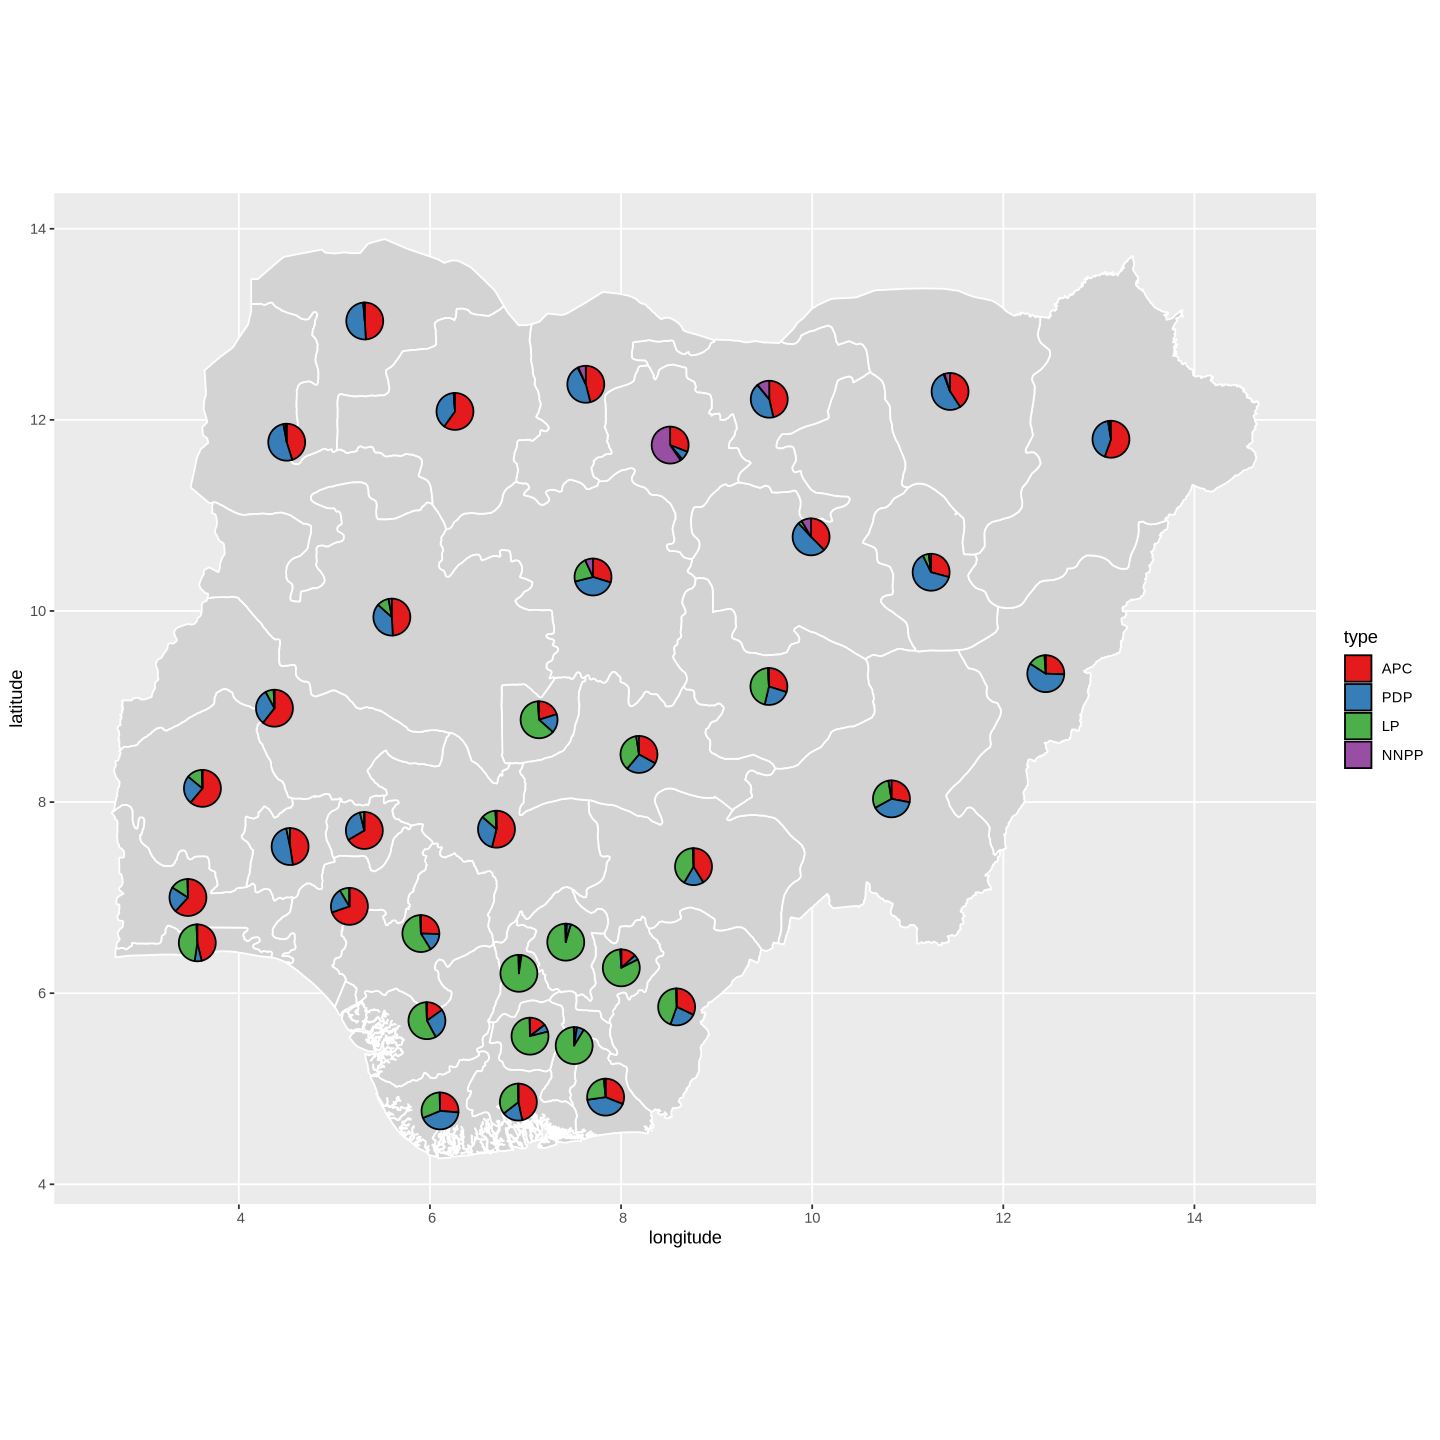

In [9]:
INEC %>% 
    ggplot() + 
        geom_sf(data=NIG, fill='lightgrey', col='white', lwd=0.5)  + 
        geom_scatterpie(aes(x=longitude, y=latitude, group=State), data=INEC, cols=c('APC', 'PDP', 'LP', 'NNPP')) + 
        scale_fill_brewer(palette='Set1', direction=1)

In [10]:
#display.brewer.all()

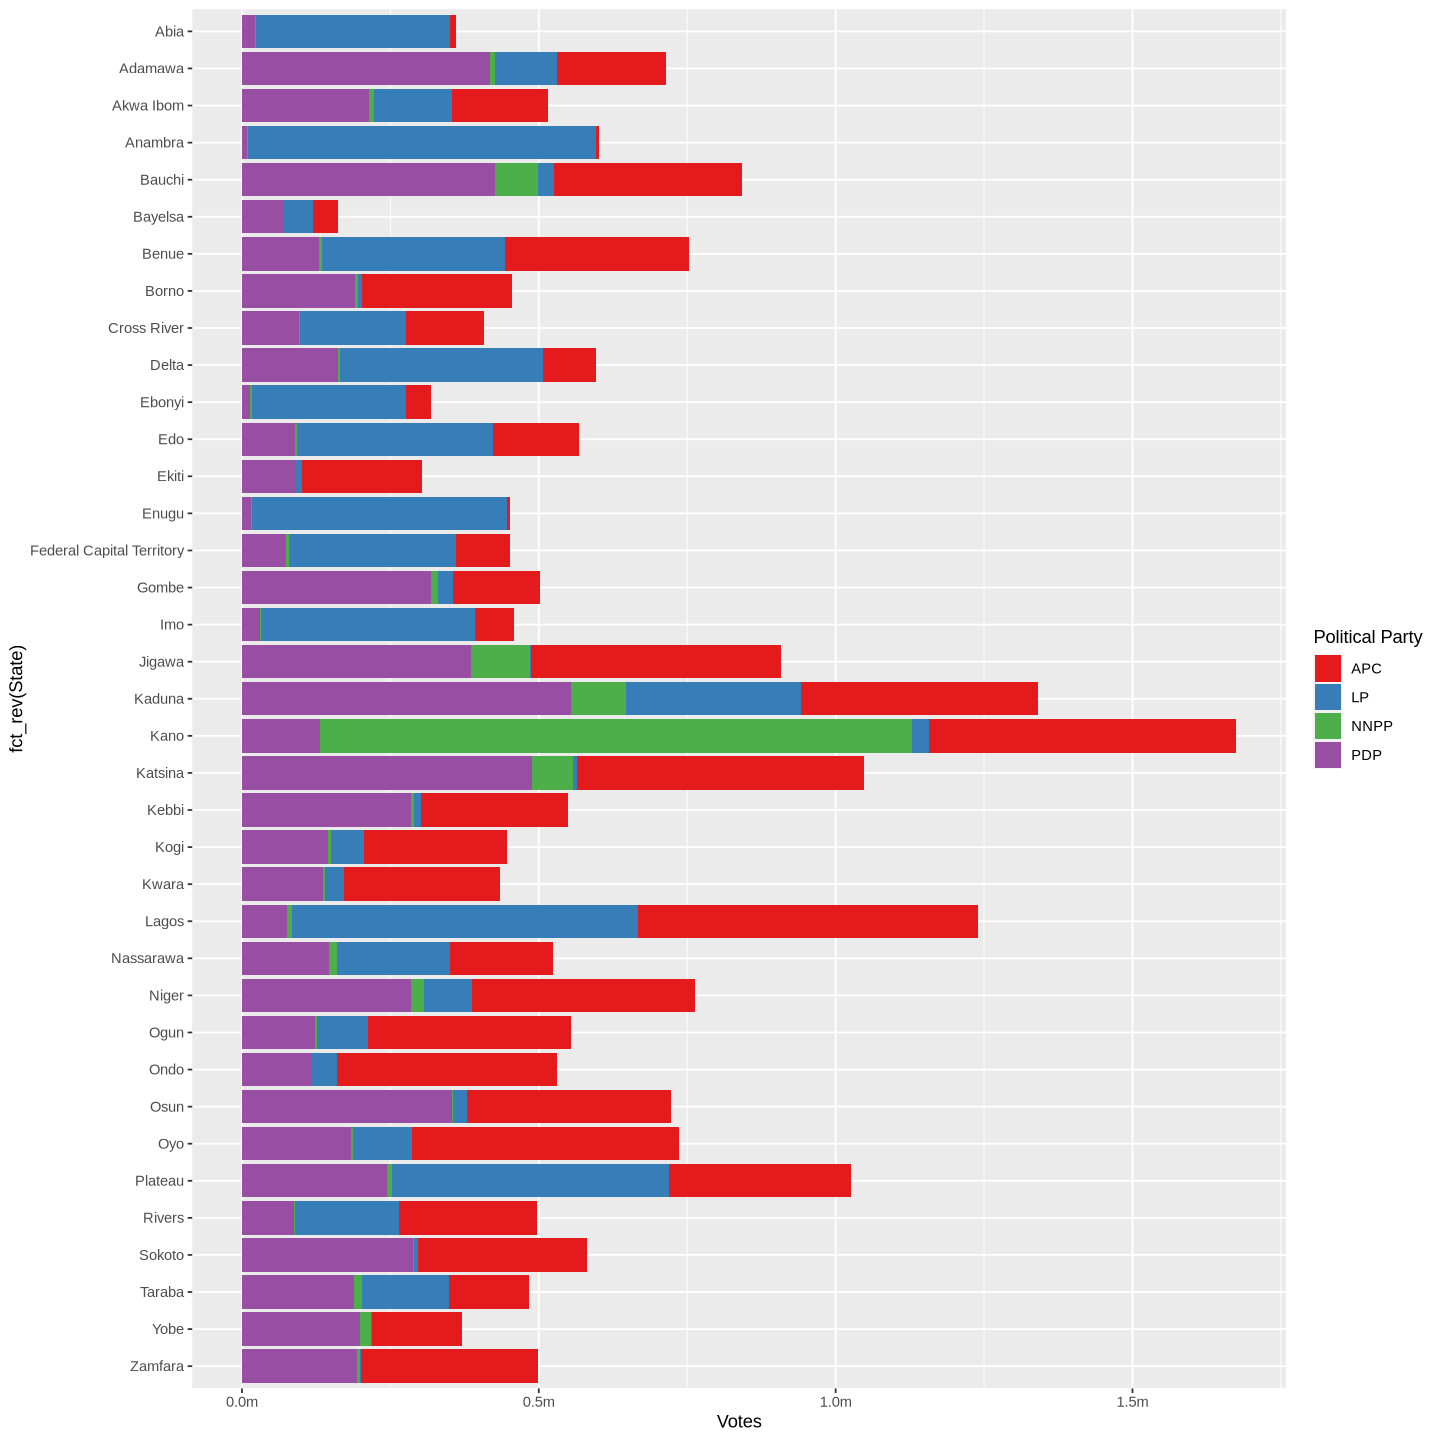

In [11]:
INEC %>% 
    select(-longitude, -latitude) %>%
    pivot_longer(cols = c('APC', 'PDP', 'LP', 'NNPP'), names_to='Political Party', values_to='Votes') %>% 
    ggplot() + 
        geom_col(aes(y=fct_rev(State), x=Votes, fill=`Political Party`)) + 
        scale_fill_brewer(palette = 'Set1') + 
        scale_x_continuous(labels = label_number(suffix = 'm', scale=1e-6))